In [78]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
from chart_studio import plotly
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [484]:
total_df=pd.read_excel('IMdB final file.xlsx')

In [365]:
total_df.head()

,Movie Key,Title,Release_Year,Movie Link,IMdB Rating,Number of Votes,Genre 1,Genre 2,Genre 3,Plot,...,Language 7,Language 8,Language 9,Language 10,Language 11,Language 12,Language 13,Language 14,Language 15,Num_Languages
0,1,The Shawshank Redemption,1994,https://www.imdb.com/title/tt0111161/,9.3,2722021,Drama,NaN,NaN,"Over the course of several years, two convicts...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2,The Dark Knight,2008,https://www.imdb.com/title/tt0468569/,9.0,2694867,Action,Crime,Drama,When the menace known as the Joker wreaks havo...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,3,Inception,2010,https://www.imdb.com/title/tt1375666/,8.8,2391640,Action,Adventure,Sci-Fi,A thief who steals corporate secrets through t...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,4,Fight Club,1999,https://www.imdb.com/title/tt0137523/,8.8,2165380,Drama,NaN,NaN,An insomniac office worker and a devil-may-car...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,5,Forrest Gump,1994,https://www.imdb.com/title/tt0109830/,8.8,2116607,Drama,Romance,NaN,The history of the United States from the 1950...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [366]:
total_df=total_df.fillna(0)

In [180]:
total_df

,Movie Key,Title,Release_Year,Movie Link,IMdB Rating,Number of Votes,Genre 1,Genre 2,Genre 3,Plot,...,Language 6,Language 7,Language 8,Language 9,Language 10,Language 11,Language 12,Language 13,Language 14,Language 15
0,1,The Shawshank Redemption,1994,https://www.imdb.com/title/tt0111161/,9.3,2722021,Drama,0,0,"Over the course of several years, two convicts...",...,0,0,0,0,0,0,0,0,0,0
1,2,The Dark Knight,2008,https://www.imdb.com/title/tt0468569/,9.0,2694867,Action,Crime,Drama,When the menace known as the Joker wreaks havo...,...,0,0,0,0,0,0,0,0,0,0
2,3,Inception,2010,https://www.imdb.com/title/tt1375666/,8.8,2391640,Action,Adventure,Sci-Fi,A thief who steals corporate secrets through t...,...,0,0,0,0,0,0,0,0,0,0
3,4,Fight Club,1999,https://www.imdb.com/title/tt0137523/,8.8,2165380,Drama,0,0,An insomniac office worker and a devil-may-car...,...,0,0,0,0,0,0,0,0,0,0
4,5,Forrest Gump,1994,https://www.imdb.com/title/tt0109830/,8.8,2116607,Drama,Romance,0,The history of the United States from the 1950...,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,4066,Good Morning,1959,https://www.imdb.com/title/tt0053134/,7.8,10026,Comedy,Drama,Family,Two boys begin a silence strike to press their...,...,0,0,0,0,0,0,0,0,0,0
4066,4067,The Admiral,2015,https://www.imdb.com/title/tt2544766/,7.0,10021,Action,Biography,Drama,When the young republic of The Netherlands is ...,...,0,0,0,0,0,0,0,0,0,0
4067,4068,The Hairdresser's Husband,1990,https://www.imdb.com/title/tt0100112/,7.2,10017,Comedy,Drama,Romance,Antoine has always been fascinated by a hairdr...,...,0,0,0,0,0,0,0,0,0,0
4068,4069,Julia,1977,https://www.imdb.com/title/tt0076245/,7.1,10015,Drama,0,0,"At the behest of an old and dear friend, playw...",...,0,0,0,0,0,0,0,0,0,0


In [367]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4070 entries, 0 to 4069
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Movie Key                     4070 non-null   int64  
 1   Title                         4070 non-null   object 
 2   Release_Year                  4070 non-null   int64  
 3   Movie Link                    4070 non-null   object 
 4   IMdB Rating                   4070 non-null   float64
 5   Number of Votes               4070 non-null   int64  
 6   Genre 1                       4070 non-null   object 
 7   Genre 2                       4070 non-null   object 
 8   Genre 3                       4070 non-null   object 
 9   Plot                          4070 non-null   object 
 10  Certification_Rating          4070 non-null   object 
 11  RT (mins)                     4070 non-null   object 
 12  Release_Day                   4070 non-null   object 
 13  Rel

In [6]:
total_df['Boxoffice_Collection ($ USD)']=total_df['Boxoffice_Collection ($ USD)'].str.replace(r'^\s*', '').str.replace(',', '')

C:\Users\Ideapoke\AppData\Local\Temp\ipykernel_9540\734681245.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [7]:
total_df['Boxoffice_Collection ($ USD)']

0         28884716
1       1006234167
2        870792649
3        101209702
4        678226465
           ...    
4065           NaN
4066       6398252
4067       1217084
4068      20714400
4069        688523
Name: Boxoffice_Collection ($ USD), Length: 4070, dtype: object

In [86]:
total_df['Boxoffice_Collection ($ USD)'].max()

2799439100.0

1. Top 10 Movies which released widely (most languages)

2. We call them Masterpieces: 
Top 5 Movies with more awards and big box office numbers

3. How Non-english movie fared over decades? - Year vs Critic reviews, Metascore, Box office 

4. Who is the Most valuable contributor to the world cinema?- Individuals with more credits as director/writer/star.

5. The Members of the Destruction:
Best Writer-Director-Actor combination in terms of Box office and Awards

6. How Genres, Rating evolved over decades?

In [ ]:
total_df['Release_Language'] = df.filter(like='Release_language').apply(lambda row: row[row != '-'].count(), axis=1)


### 1. Top 10 Movies which released widely (most languages)


In [485]:
release_language_columns = total_df.columns[34:49]

In [486]:
release_language_columns

Index(['Language 1', 'Language 2', 'Language 3', 'Language 4', 'Language 5',
       'Language 6', 'Language 7', 'Language 8', 'Language 9', 'Language 10',
       'Language 11', 'Language 12', 'Language 13', 'Language 14',
       'Language 15'],
      dtype='object')

In [487]:
total_df[release_language_columns]

,Language 1,Language 2,Language 3,Language 4,Language 5,Language 6,Language 7,Language 8,Language 9,Language 10,Language 11,Language 12,Language 13,Language 14,Language 15
0,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,English,Mandarin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,English,Japanese,French,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,English,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,Japanese,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4066,Dutch,English,French,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4067,French,Arabic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4068,English,French,German,Russian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [488]:
def remove_non_text_symbols(value):
    if isinstance(value, str):
        cleaned_value = re.sub(r"['\[\]]", '', value)
    elif isinstance(value, list):
        cleaned_value = [re.sub(r"['\[\]]", '', item) for item in value]
    else:
        cleaned_value = value
    return cleaned_value

In [489]:
total_df[release_language_columns]=total_df[release_language_columns].applymap(remove_non_text_symbols)

In [490]:
total_df[release_language_columns].fillna(0)

,Language 1,Language 2,Language 3,Language 4,Language 5,Language 6,Language 7,Language 8,Language 9,Language 10,Language 11,Language 12,Language 13,Language 14,Language 15
0,English,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,English,Mandarin,0,0,0,0,0,0,0,0,0,0,0,0,0
2,English,Japanese,French,0,0,0,0,0,0,0,0,0,0,0,0
3,English,0,0,,0,0,0,0,0,0,0,0,0,0,0
4,English,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,Japanese,English,0,0,0,0,0,0,0,0,0,0,0,0,0
4066,Dutch,English,French,0,0,0,0,0,0,0,0,0,0,0,0
4067,French,Arabic,0,0,0,0,0,0,0,0,0,0,0,0,0
4068,English,French,German,Russian,0,0,0,0,0,0,0,0,0,0,0


In [491]:
total_df.loc[:, 'Language 1'] = total_df['Language 1'].str.lstrip()

In [492]:
language1_counts=total_df[release_language_columns]['Language 1'].value_counts()
language1_counts=pd.DataFrame(language1_counts)
language1_counts.columns=['count']
language1_counts

,count
English,2587
Hindi,258
French,211
Japanese,147
Spanish,93
...,...
Central,1
Neapolitan,1
Zulu,1
Mongolian,1


In [493]:
import plotly.express as px

fig = px.bar(language1_counts, y='count', title='Language Counts', labels={'Count': 'Language Count'})
fig.show()

In [494]:
#removine roman from year data
def remove_roman_numerals(text):
    if isinstance(text, str):
        return re.sub(r'\b[IVXLCDM]+\b', '', text)
    else:
        return text

In [495]:
total_df['Release_Year']=total_df['Release_Year'].apply(remove_roman_numerals)

In [496]:
total_df['Release_Year']=total_df['Release_Year'].replace(' ', '')

In [497]:
import plotly.express as px

language_counts = total_df.groupby(['Release_Year', 'Language 1']).size().reset_index(name='Count')
fig = px.line(language_counts, x='Release_Year', y='Count', color='Language 1', title='Language Counts Over Years')
fig.show()

In [323]:
total_df[release_language_columns].fillna(0)

,Language 1,Language 2,Language 3,Language 4,Language 5,Language 6,Language 7,Language 8,Language 9,Language 10,Language 11,Language 12,Language 13,Language 14,Language 15
0,English,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,English,Mandarin,0,0,0,0,0,0,0,0,0,0,0,0,0
2,English,Japanese,French,0,0,0,0,0,0,0,0,0,0,0,0
3,English,0,0,,0,0,0,0,0,0,0,0,0,0,0
4,English,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,Japanese,English,0,0,0,0,0,0,0,0,0,0,0,0,0
4066,Dutch,English,French,0,0,0,0,0,0,0,0,0,0,0,0
4067,French,Arabic,0,0,0,0,0,0,0,0,0,0,0,0,0
4068,English,French,German,Russian,0,0,0,0,0,0,0,0,0,0,0


In [498]:
#create lang counts for a movie

total_df['Num_Languages'] = (total_df.iloc[:, 34:49]).nunique(axis=1)
df_sorted = total_df.sort_values(by='Num_Languages', ascending=False)

top_10_wide_released_movies = df_sorted.head(10)[['Title','Release_Year', 'Num_Languages']]

print(top_10_wide_released_movies)

                     Title  Release_Year  Num_Languages
547        The Jungle Book          2016             15
1864           Son of Saul          2015              9
500                  Babel          2006              9
675                 Munich          2005              9
2900             99 francs          2007              9
266        Children of Men          2006              9
1478  John Wick: Chapter 4          2023              8
318              The Mummy          1999              8
369       Fast & Furious 6          2013              8
1768          Drive My Car          2021              8


In [ ]:
#First language movie pie diagram


## 2. We call them Masterpieces: 
### Top 10 Movies with more award wins and big box office numbers

In [126]:
sorted_df = total_df.sort_values(by=['Total Wins','Boxoffice_Collection ($ USD)'], ascending=[False, False])
top_10_allround_movies = sorted_df.head(10)[['Title', 'Boxoffice_Collection ($ USD)', 'Total Wins']]
print(top_10_allround_movies)

                                             Title  \
351              Everything Everywhere All at Once   
93                                        Parasite   
880                                      Nomadland   
900                                           Roma   
60                              Mad Max: Fury Road   
137                               12 Years a Slave   
94                                         Gravity   
196                                     La La Land   
489                                      Moonlight   
10   The Lord of the Rings: The Return of the King   

     Boxoffice_Collection ($ USD)  Total Wins  
351                  1.411945e+08       386.0  
93                   2.626813e+08       306.0  
880                  3.945821e+07       255.0  
900                  1.140769e+06       251.0  
60                   3.800803e+08       245.0  
137                  1.877332e+08       242.0  
94                   7.480499e+08       240.0  
196                  

## 3. How Non-English movie fared over decades? - Years vs Critic reviews, Metascore, Box office 


In [ ]:
#prepare a separate df from non-english language movies and year, critic review, meta score, box office 

In [499]:
english_movies = total_df.loc[total_df['Language 1'] == 'English']
non_english_movies = total_df.loc[total_df['Language 1'] != 'English']

In [500]:
#Evolution of non-english movies over decades
import plotly.express as px

language_counts = non_english_movies.groupby(['Release_Year', 'Language 1']).size().reset_index(name='Count')
fig = px.line(language_counts, x='Release_Year', y='Count', color='Language 1', title='Evolution of Non-English movies over decades')
fig.show()

### Hindi cinema showed substantial growth over other languages through decades

In [501]:
#Evolution of English movies over decades
import plotly.express as px

language_counts = english_movies.groupby(['Release_Year', 'Language 1']).size().reset_index(name='Count')
fig = px.line(language_counts, x='Release_Year', y='Count', color='Language 1', title='Evolution of English movies over decades')
fig.show()

#### 2016 and 2007 are considered as great years for English Cinema
### What are some common genres in these two years

In [502]:
#Genre heatmap for 2007 and 2016 years
# pivot_genre_df = total_df.pivot_table(index='Release_Year', columns=['Genre 1', 'Genre 2', 'Genre 3'], aggfunc=len, fill_value=0)
filtered_df_2007 =total_df[ total_df['Release_Year'].isin([2007])]
filtered_df_2016 =total_df[ total_df['Release_Year'].isin([2016])]

In [425]:
filtered_df_2007

,Movie Key,Title,Release_Year,Movie Link,IMdB Rating,Number of Votes,Genre 1,Genre 2,Genre 3,Plot,...,Language 7,Language 8,Language 9,Language 10,Language 11,Language 12,Language 13,Language 14,Language 15,Num_Languages
67,68,No Country for Old Men,2007,https://www.imdb.com/title/tt0477348/,8.2,992437,Crime,Drama,Thriller,Violence and mayhem ensue after a hunter stumb...,...,0,0,0,0,0,0,0,0,0,3
116,117,I Am Legend,2007,https://www.imdb.com/title/tt0480249/,7.2,773943,Action,Drama,Horror,Years after a plague kills most of humanity an...,...,0,0,0,0,0,0,0,0,0,2
125,126,Ratatouille,2007,https://www.imdb.com/title/tt0382932/,8.1,756802,Animation,Adventure,Comedy,A rat who can cook makes an unusual alliance w...,...,0,0,0,0,0,0,0,0,0,3
169,170,Pirates of the Caribbean: At World's End,2007,https://www.imdb.com/title/tt0449088/,7.1,662308,Action,Adventure,Fantasy,"Captain Barbossa, Will Turner and Elizabeth Sw...",...,0,0,0,0,0,0,0,0,0,2
175,176,Transformers,2007,https://www.imdb.com/title/tt0418279/,7.0,647560,Action,Adventure,Sci-Fi,An ancient struggle between two Cybertronian r...,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3710,3711,Bheja Fry,2007,https://www.imdb.com/title/tt1014672/,7.6,12002,Comedy,Drama,0,"Ranjit, who makes fun of idiots, gets complete...",...,0,0,0,0,0,0,0,0,0,2
3914,3915,Shotgun Stories,2007,https://www.imdb.com/title/tt0952682/,7.1,10840,Drama,Thriller,0,"Set in Arkansas, this poetic and powerful film...",...,0,0,0,0,0,0,0,0,0,2
3972,3973,Shootout at Lokhandwala,2007,https://www.imdb.com/title/tt0811066/,7.1,10501,Action,Crime,History,An account of the gangster Mahindra Dolas and ...,...,0,0,0,0,0,0,0,0,0,2
3979,3980,Cargo 200,2007,https://www.imdb.com/title/tt0847880/,7.1,10470,Crime,Drama,Thriller,A young woman is taken hostage by a police off...,...,0,0,0,0,0,0,0,0,0,2


In [503]:
genre1_2007=filtered_df_2007['Genre 1'].value_counts()
genre1_2016=filtered_df_2016['Genre 1'].value_counts()

In [504]:
genre1_2007=pd.DataFrame(genre1_2007)
genre1_2016=pd.DataFrame(genre1_2016)

In [505]:
import plotly.express as px

fig = px.bar(genre1_2007, y='Genre 1', title='Genres 2007', labels={'Count': 'Language Count'})
fig.show()

fig = px.bar(genre1_2016, y='Genre 1', title='Genres 2016', labels={'Count': 'Language Count'})
fig.show()

In [506]:
import plotly.express as px
fig = px.scatter(x=total_df['Release_Year'], y=total_df['Boxoffice_Collection ($ USD)'],text=total_df['Title'])
fig.update_traces(textposition='top center')
fig.show()

In [523]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['English Movies', 'Non-English Movies'])
fig.add_trace(
    go.Box(x=english_movies['Release_Year'], y=english_movies['MetaScore'], name='English Movies'),
    row=1, col=1
)
fig.add_trace(
    go.Box(x=non_english_movies['Release_Year'], y=non_english_movies['MetaScore'], name='Non-English Movies'),
    row=1, col=2
)

fig.update_layout(title_text='Release Year vs Metascore', showlegend=False)
fig.show()

In [539]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a scatter plot for English movies
fig1 = px.scatter(english_movies, x='Number of Votes', y='IMdB Rating', title='Votes vs IMDb Rating for English Movies',
                  labels={'Number of Votes': 'Number of Votes', 'IMDb Rating': 'IMDb Rating'})

# Create a scatter plot for non-English movies
fig2 = px.scatter(non_english_movies, x='Number of Votes', y='IMdB Rating', title='Votes vs IMDb Rating for Non-English Movies',
                  labels={'Number of Votes': 'Number of Votes', 'IMDb Rating': 'IMDb Rating'})

# Display the plots side by side
fig1.show()
fig2.show()


In [ ]:
### Ratings will change as the world cinema i opened now with OTT, there are no non-english movies with more than 1M ratings  

In [540]:
popular_movies = total_df[total_df['Number of Votes'] > 1000000]

# Count the number of popular movies
num_popular_movies = len(popular_movies)

print(f"Number of English movies with more than one million votes: {num_popular_movies}")

Number of English movies with more than one million votes: 66


In [543]:
# Filter out zero values and reshape the DataFrame
genres_df = total_df[['Genre 1', 'Genre 2', 'Genre 3']].stack().reset_index(level=1, drop=True)
genres_df = genres_df[genres_df != 0]

# Count the occurrences of each genre
genre_counts = genres_df.value_counts()

# Create an interactive bar plot with custom bar color
fig = px.bar(genre_counts, x=genre_counts.index, y=genre_counts.values,
             title='Genres of the top cinema',
             labels={'index': 'Genre', 'y': 'Count'},
             color=genre_counts.index)  # Use genre names as colors

# Display the plot
fig.show()

## Insight- 3:
### "Upon analyzing the data, the top genres for the most popular films are Drama, Comedy, and Crime. These genres seem to resonated well with the audience, as they consistently appear as the preferred choices among viewers."

In [547]:
total_df['Genre Combination'] = total_df[['Genre 1', 'Genre 2', 'Genre 3']].astype(str).agg(', '.join, axis=1)

# Count the occurrences of each genre combination
genre_combination_counts = total_df['Genre Combination'].value_counts()

# Create a bar plot for common genre combinations
fig = px.bar(genre_combination_counts, x=genre_combination_counts.index, y=genre_combination_counts.values,
             title='Common Genre Combinations',
             labels={'x': 'Genre Combination', 'y': 'Frequency'},
             color=genre_combination_counts.index)  # Use genre combinations as colors

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Display the plot
fig.show()

## Insight-4:
### Top 5 successful genre combinations of top cinema are: 
1. Drama
2. Comedy + Drama
3. Drama + Romance
4. Comedy + Drama + Romance
5. Action + Crime + Drama 

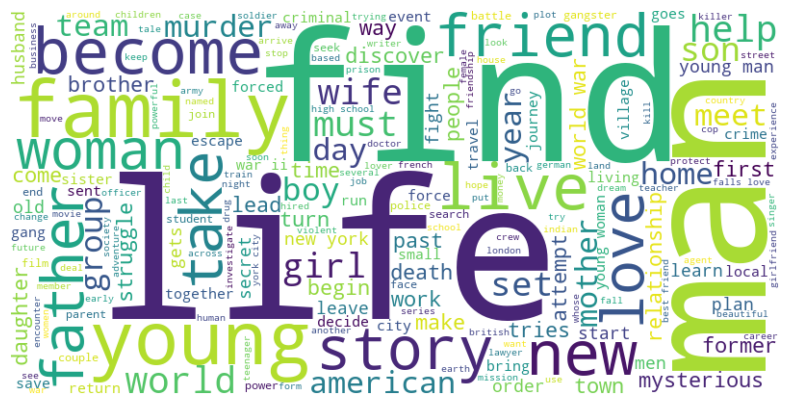

In [552]:
# Assume you have a DataFrame named 'total_df' with a 'Plot' column

# Combine all plot summaries into a single string
all_plots = ' '.join(total_df['Plot'])

# Tokenize the text
words = word_tokenize(all_plots)

# Remove punctuation and convert to lowercase
words = [word.lower() for word in words if word.isalpha()]

# Load stopwords
nltk_stopwords = set(stopwords.words('english'))

# Additional words to exclude
custom_stopwords = set(['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten'])

# Combine stopwords
all_stopwords = nltk_stopwords.union(custom_stopwords)

# Remove stopwords
filtered_words = [word for word in words if word not in all_stopwords]

# Create a string from filtered words
filtered_text = ' '.join(filtered_words)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Display the WordCloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Insight-5:
### This for aspiring writers- 
### Upon analyzing the plot summaries of the movies, certain recurring themes and central elements emerge. Words such as "find," "life," "man," "family," "friend," "love," "father," and "mother" stand out prominently. These thematic keywords suggest that the movies in our dataset often revolve around profound human experiences, relationships, and personal journeys. The prevalence of these words highlights the significance of emotional connections, personal growth, and familial dynamics in the narratives, indicating a strong resonance with relatable human stories. 

In [358]:
total_df.to_excel('Corrected IMdb file.xlsx')

In [ ]:
#1. top 5 Movies released in a greater number of languages in the world?
total_df['Release_Language']

2010

In [ ]:
total_df['']